In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Dataset 확인

In [2]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId : 각 승객의 고유 번호

Survived : 생존 여부 (종속 변수)

Pclass : 티켓의 승선권 클래스
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

Name : 이름

Sex : 성별

Age : 나이

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

Parch : 동반한 Parent(부모) Child(자식)의 수

Ticket : 티켓의 고유넘버

Fare : 티켓의 요금

Cabin : 객실 번호

Embarked : 승선한 항
- C = Cherbourg
- Q = Queenstown
- S = Southampton 

In [4]:
# 각 feature별 통계치 확인
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null 데이터 확인

In [6]:
for col in df_train.columns:
    msg = 'column : {:>10} \t Percent of NaN value: {:.2f}'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    # {:>10}: 오른쪽 정렬
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00
column :   Survived	 Percent of NaN value: 0.00
column :     Pclass	 Percent of NaN value: 0.00
column :       Name	 Percent of NaN value: 0.00
column :        Sex	 Percent of NaN value: 0.00
column :        Age	 Percent of NaN value: 19.87
column :      SibSp	 Percent of NaN value: 0.00
column :      Parch	 Percent of NaN value: 0.00
column :     Ticket	 Percent of NaN value: 0.00
column :       Fare	 Percent of NaN value: 0.00
column :      Cabin	 Percent of NaN value: 77.10
column :   Embarked	 Percent of NaN value: 0.22


In [7]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00
column :     Pclass	 Percent of NaN value: 0.00
column :       Name	 Percent of NaN value: 0.00
column :        Sex	 Percent of NaN value: 0.00
column :        Age	 Percent of NaN value: 20.57
column :      SibSp	 Percent of NaN value: 0.00
column :      Parch	 Percent of NaN value: 0.00
column :     Ticket	 Percent of NaN value: 0.00
column :       Fare	 Percent of NaN value: 0.24
column :      Cabin	 Percent of NaN value: 78.23
column :   Embarked	 Percent of NaN value: 0.00


train, test 셋에서 Age(약 20%), Cabin(약 80%), Embarked(train : 0.22%) null data 확인

<AxesSubplot:>

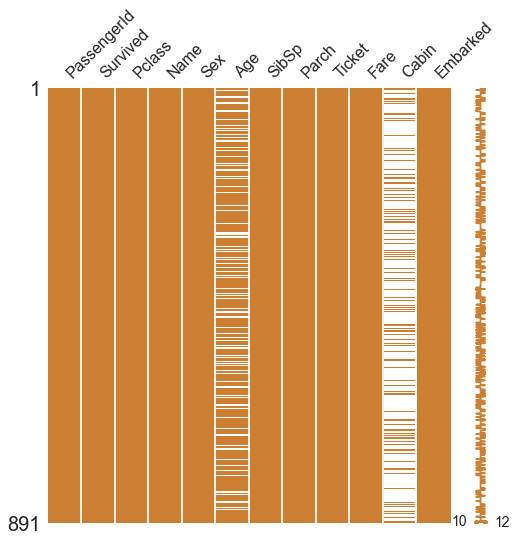

In [8]:
# MANO 라이브러리를 사용하면 Null data의 존재를 더 쉽게 확인할 수 있음
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

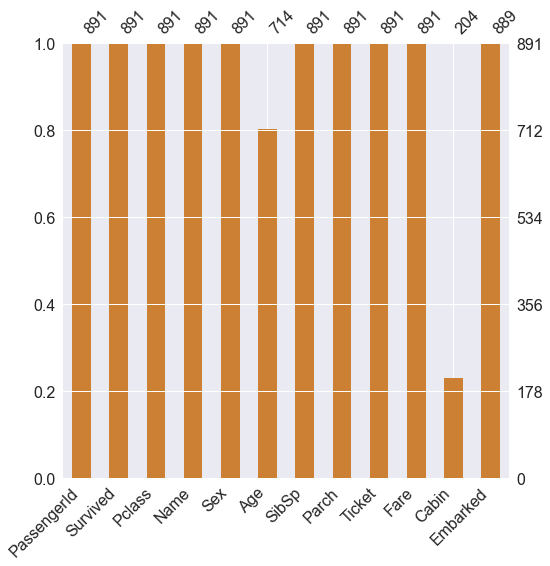

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

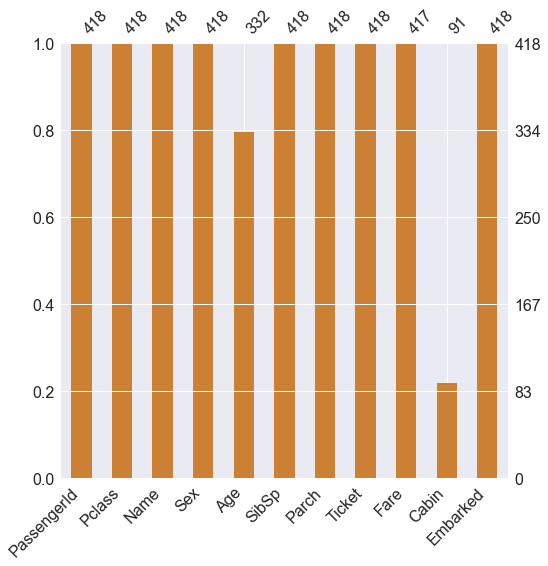

In [10]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 1. 2 Target Label 확인

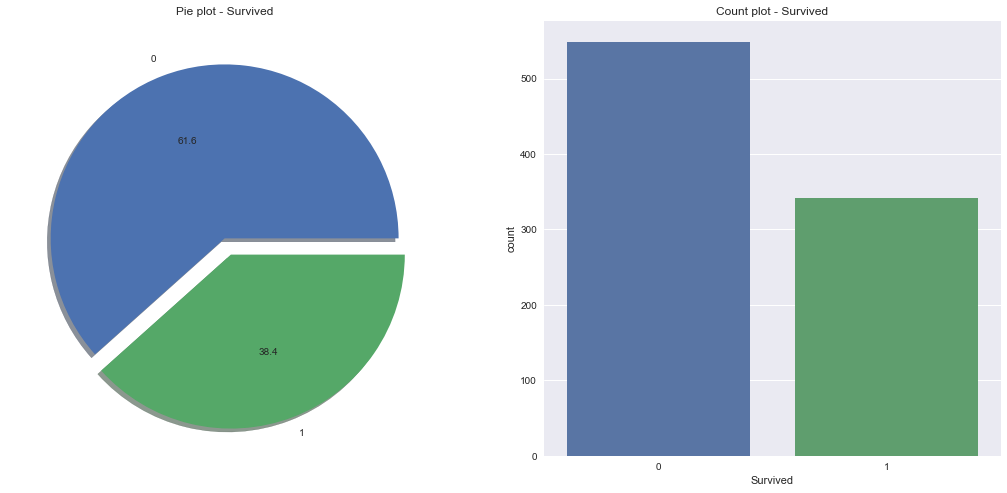

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f', ax=ax[0], shadow=True)  
# explode : 부채꼴이 파이 차트의 중심에서 벗어나는 정도 [0, 0.1] -> Survivied = 1에 대하여 반지름의 10% 만큼 벗어나도록 설정
# autopct : 부채꼴 안에 표시될 숫자의 형식
# shadow : True로 설정하면 파이 차트에 그림자 표시
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 생존률은 38.4%
- target label의 분포가 제법 균일함 -> 불균형 분포인 경우 모델의 평가 방법을 다르게 해야할 수도 있음

# 2. 탐색적 자료 분석

## 2. 1 Pclass

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
# crosstab 오류 해결 코드
pip freeze  # 현재 환경에 설치된 모든 패키지의 버전을 확인

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
alembic==1.10.2
anaconda-client==1.7.2
anaconda-navigator==2.0.4
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/workNote: you may need to restart the kernel to use updated packages.
anyio==3.6.2
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work



autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/work
backports.shutil-get-terminal-size @ file:///tmp/build/80754af9/backports.shutil_get_terminal_size_1608222128777/work
backports.tempfile @ file:///home/linux1/recipes/ci/backports.tempfile_1610991236607/work
backports.weakref==1.0.post1
bcrypt @ file:///C:/ci/bcrypt_1597936263757/work
beautifulsoup4 @ file:///home/linux1/recipes/ci/beautifulsoup4_1610988766420/work
bioinfokit==0.6
bitarray @ file:///C:/ci/bitarray_1618435038389/work
bkcharts==0.2
black==19.10b0
bleach @ file:///tmp/build/80754af9/bleach_1612211392645/work
bokeh @ file:///C:/ci/bokeh_1620784067744/work
boto==2.49.0
Bottleneck==1.3.2
branca==0.4.2
brotlipy==0.7.0
certifi==2020.12.5
certipy==0.1.3
cffi @ file:///C:/ci/cffi_1613

In [ ]:
# 아래 코드에서 Jinja 오류 해결 코드
pip install --upgrade Jinja2 --user

In [15]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# margins : 교차표의 행 합, 열 합 추가하기 
# style.background_gradient(cmap='summer_r') : 수치의 크기를 색상 온도로 보는 것

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

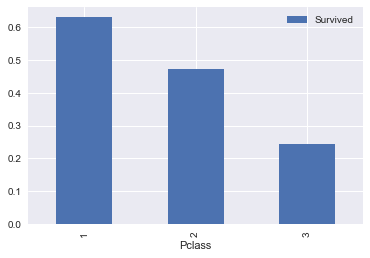

In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

Pclass가 높을수록(1st) 생존률이 높다

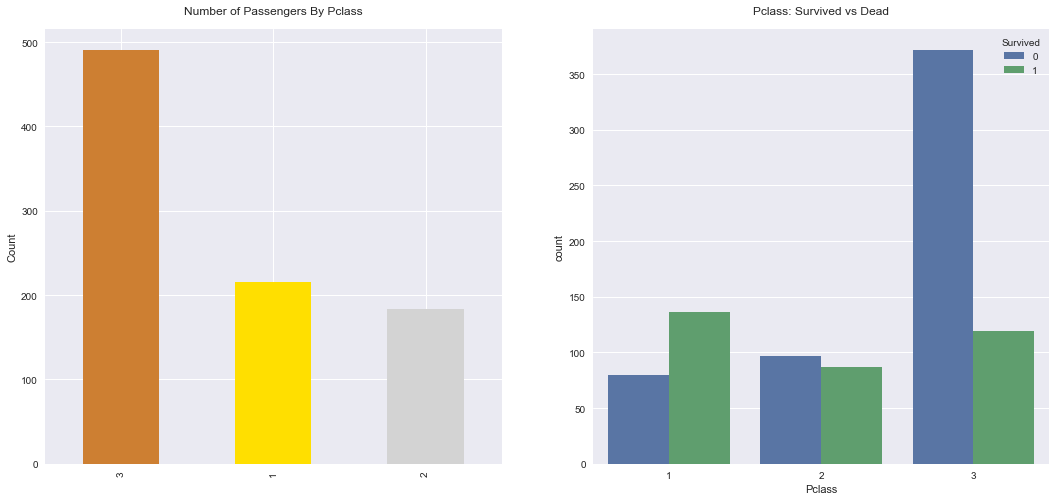

In [18]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을 수록, 생존 확률이 높음
- Pclass 1, 2, 3 순서대로 63%, 48%, 25%

## 2. 2 Sex

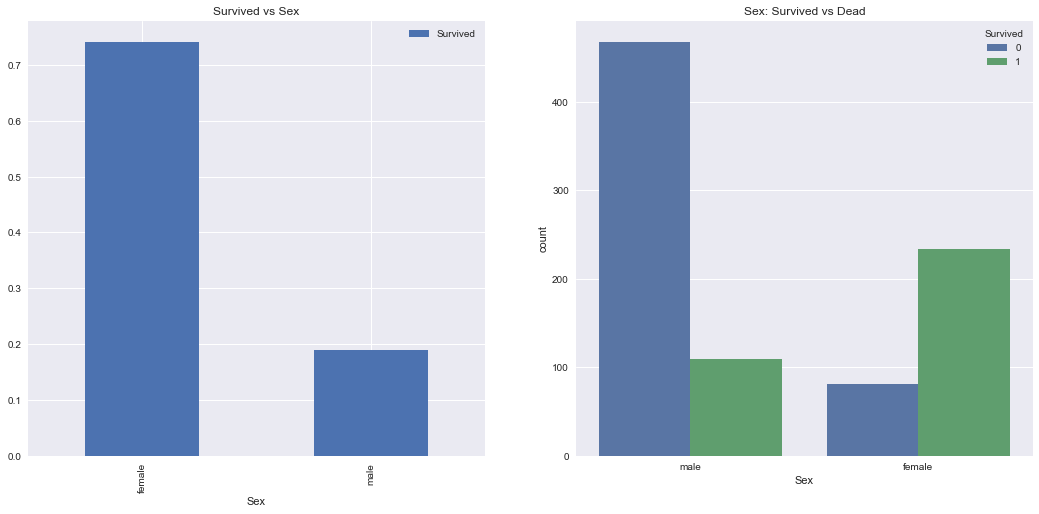

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여자가 생존할 확률이 높음

In [20]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

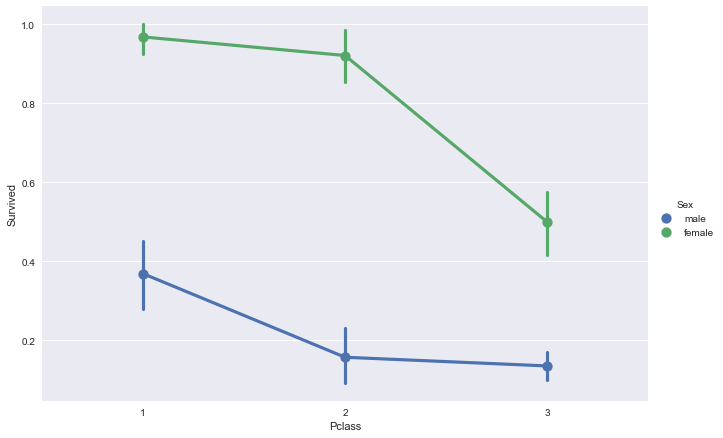

In [23]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5) 
# factorplot : 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있음

- 모든 클래스에서 여자의 생존 확률이 남자보다 높음
- 남자, 여자 상관없이 클래스가 높을 수록 생존 확률이 높음

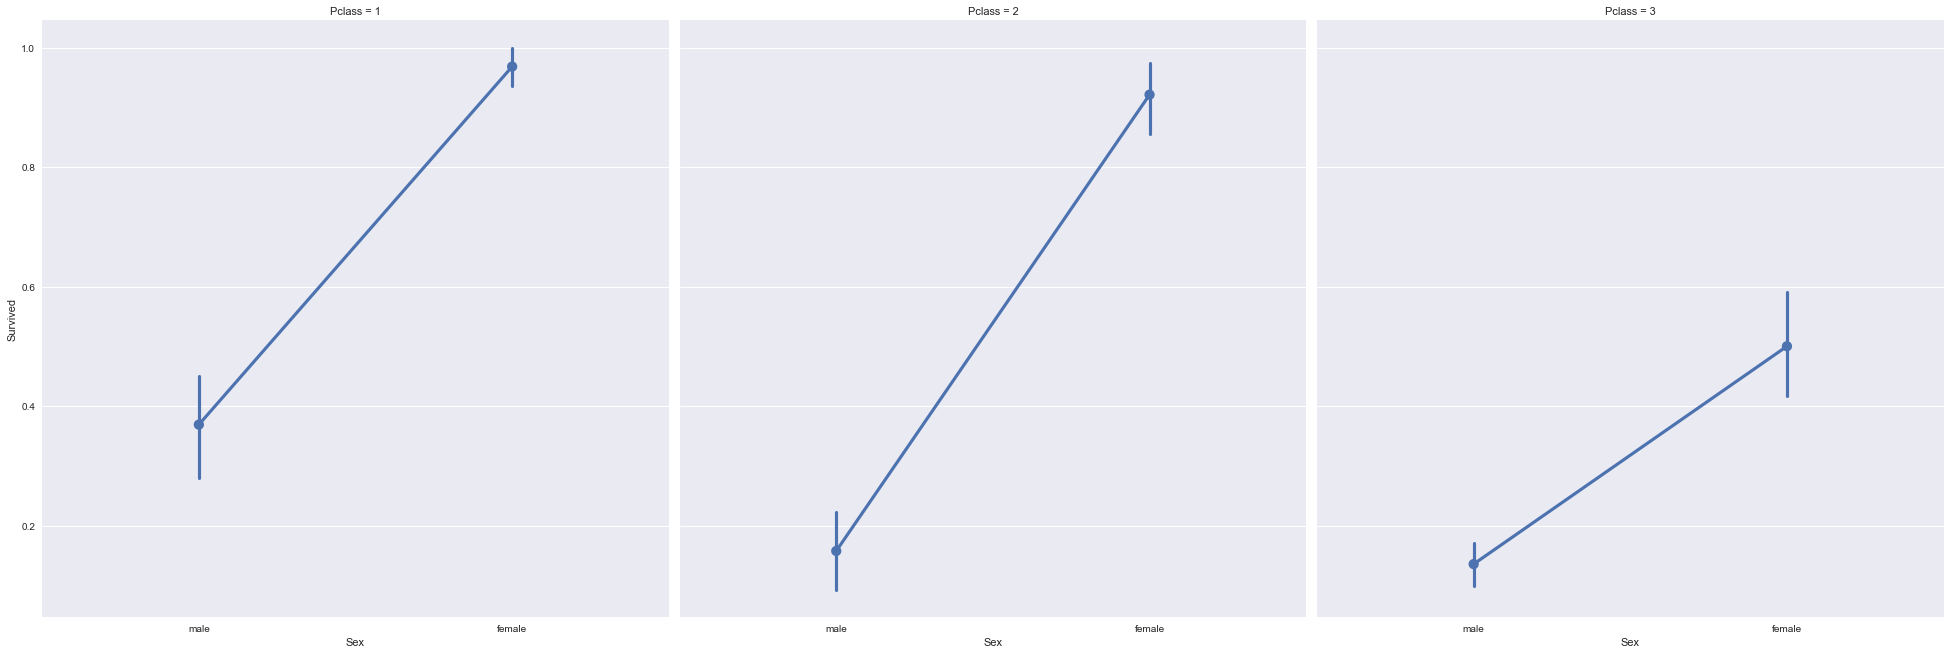

In [24]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

## 2.4 Age

In [25]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


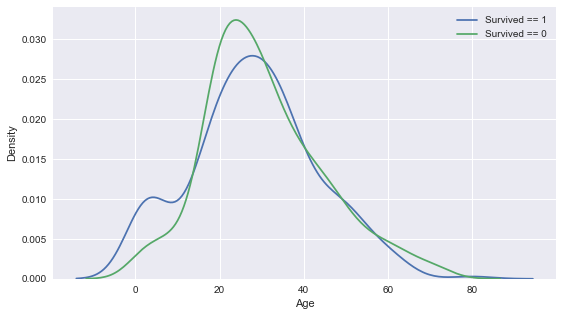

In [26]:
# 생존에 따른 Age의 histogram
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

생존자 중 나이가 어린 경우가 많음

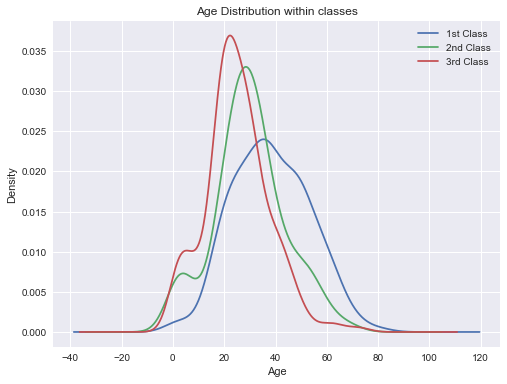

In [27]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Class가 높을 수록 나이 많은 사람의 비중이 커짐

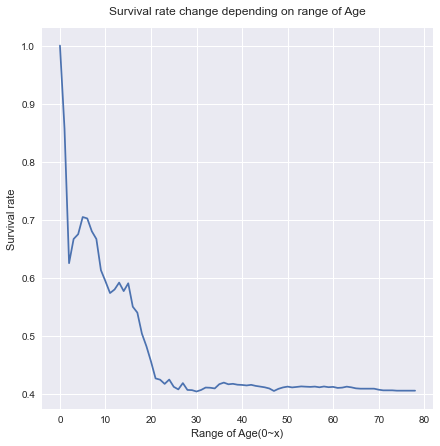

In [28]:
# 나이 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 확인
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

나이가 어릴 수록 생존률이 확실히 높음

## 2.5 Pclass, Sex, Age

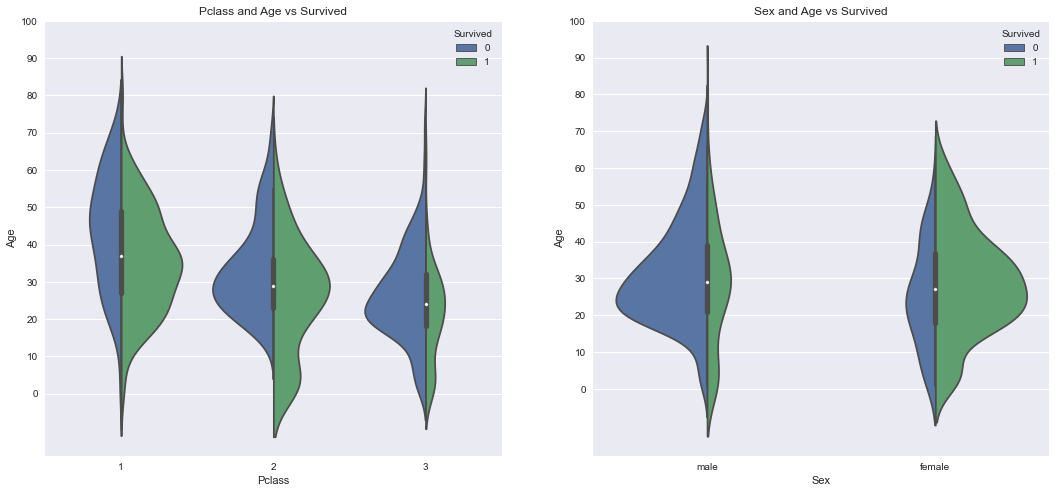

In [29]:
f,ax=plt.subplots(1, 2,figsize=(18, 8))

sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])  
# split : hue로 생성된 group의 Violin Plot 절반씩을 표현
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 확인할 수 있음
- 오른쪽 그림에서, 여자가 생존을 많이 한 것을 확인할 수 있음

## 2.6 Embarked

<AxesSubplot:xlabel='Embarked'>

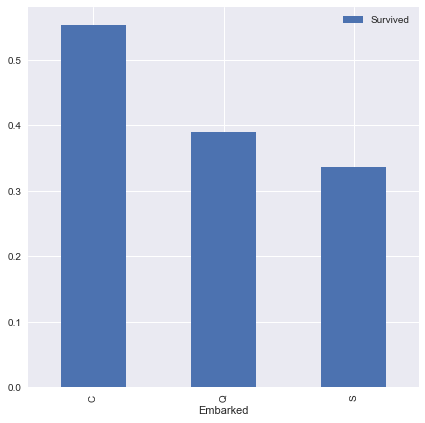

In [30]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

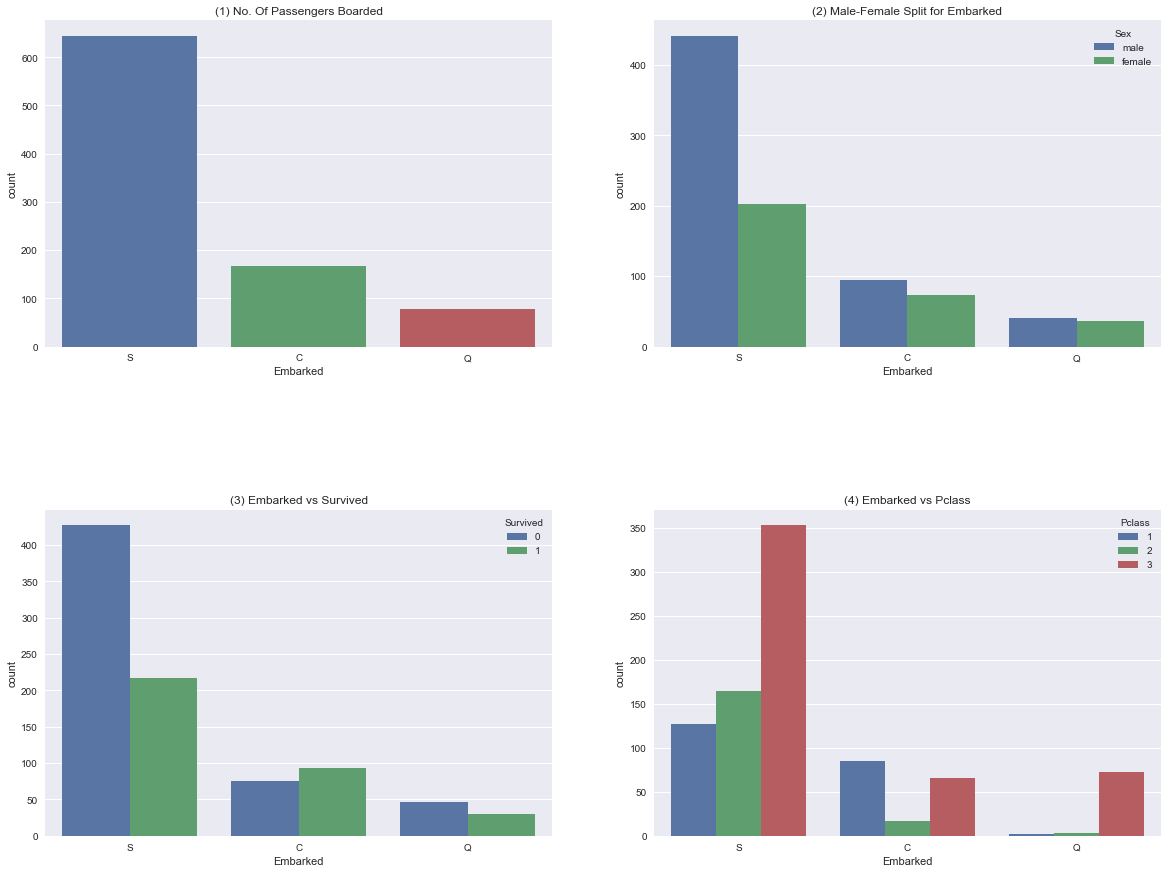

In [31]:
f,ax=plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) : S에서 가장 많은 사람이 탑승
- Figure (2) : C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많음
- Figure (3) : 생존 확률이 S의 경우 많이 낮음
- Figure (4) : Class로 split해서 보니, C가 생존 확률이 높은 건 클래스가 높은 사람이 많이 타서, S는 3rd class가 많아서 생존 확률이 낮게 나옴

## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [32]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  # +1 : 자기 자신
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [33]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


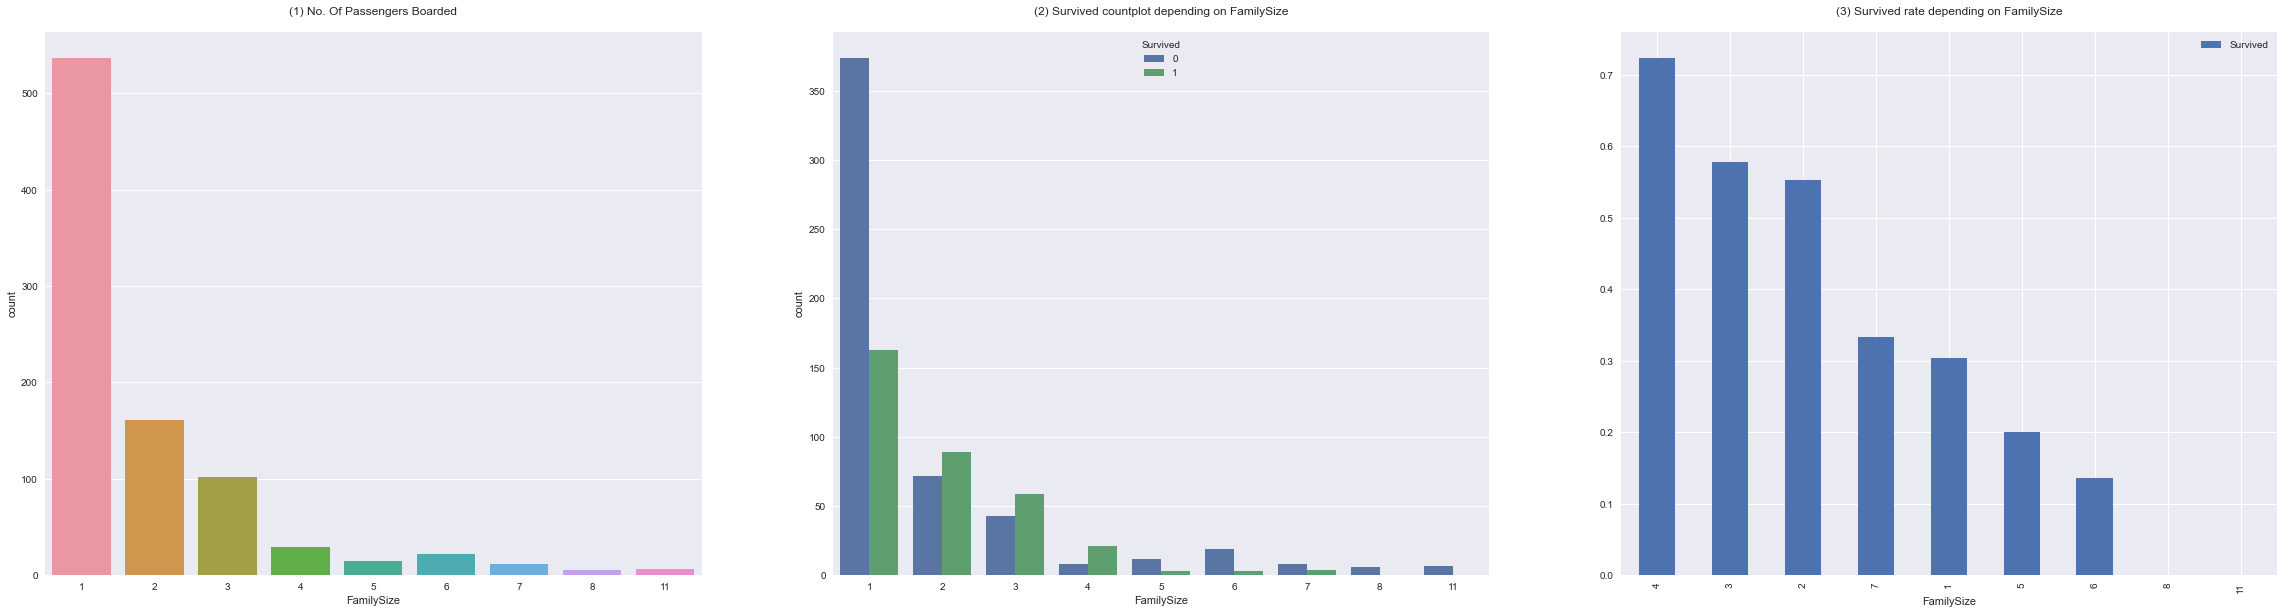

In [34]:
f,ax=plt.subplots(1, 3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) : 가족 크기가 1~11까지 있음. 대부분 1명이고 그 다음으로 2, 3, 4명
- Figure (2), (3) : 가족 크기에 따른 생존 비교. 가족이 4명인 경우 가장 생존 확률이 높고 가족 수가 많아질 수록 생존 확률도 낮아짐. 가족 수가 너무 작아도(1) 커도(5, 6, 8, 11) 생존 확률이 작음.

## 2.8 Fare

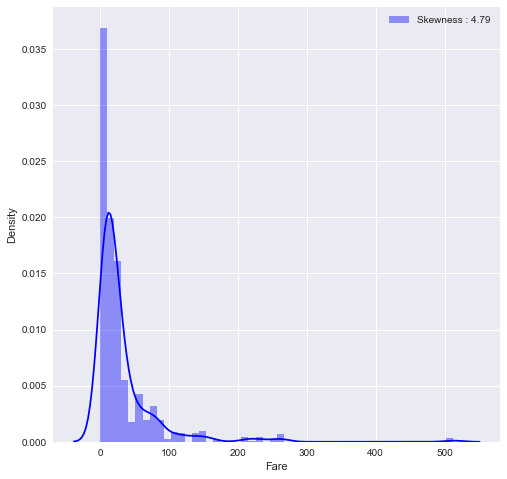

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 분포가 매우 비대칭(high skewness)이므로 이대로 모델에 넣어준다면 모델이 잘못 학습할 수도 있음. 몇 개 없는 outlier에 대해서 너무 민감하게 반응한다면 실제 예측 시에 좋지 못한 결과 도출
- outlier의 영향을 줄이기 위해 Fare에 log 변환 적용

In [36]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()  # test셋에 있는 nan value를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

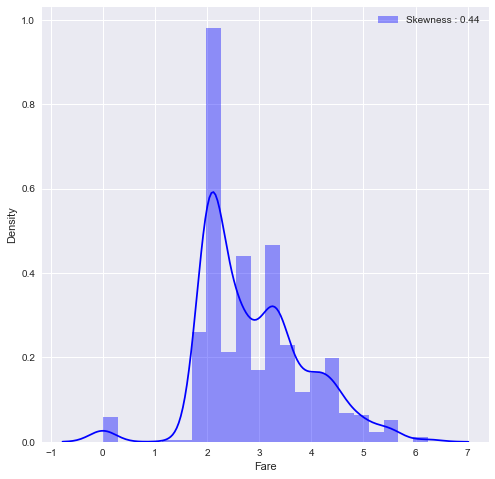

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## 2.9 Cabin

- Cabin feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않을 것으로 판단하여 모델에 포함 X

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket 

- Ticket feature는 NaN은 없지만 string data이므로 어떤 작업들을 해주어야 실제 모델에 적용 가능

In [39]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64